### Observable Trends in Weather Data
- The Temperature vs Latitude Plot demonstrates that temperatures are generally higher the closer you are to the equator (latitude     range of -20 to 20)
- The City Latitude vs Windspeed Plot shows that Windspeeds are somewhat indifferent to Latitudes, but it is important to note that highest wind speed outliers all occur at latitudes furthest from the equator.
- Cloudiness and Humidity are relatively consistent across all latitudes. Further analysis to include an additional variable may reveal further insights into those relationships


In [3]:
import json
import requests as req
import random
import seaborn as sns
import pandas as pd
import math as math
import time
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

In [6]:
api_keys = json.load(open("c:/Users/charl/Desktop/APIKeys/api_keys.json"))
print(api_keys['open_weather_map'])

ca948e37c7fc34fc07a1ece6ffdb31a0


In [2]:
api key= "e0f2d748da333e9b717839cdd8fdb7f5 "

In [3]:
#create a dataframe and select random latitude and longitude coordinates

location_data = pd.DataFrame()
location_data['lat_values'] = [np.random.uniform(-90,90) for x in range(1500)]
location_data['lng_values'] = [np.random.uniform(-180, 180) for x in range(1500)]

location_data.head()

,lat_values,lng_values
0,63.004580,57.504731
1,-80.877433,-21.529340
2,-33.619646,69.244591
3,76.794412,-147.886088
4,29.843754,-140.093445


In [4]:
#create lists for city and country. Loop through the data

location_data['city'] = ""
location_data['country'] = ""

count = 0
for index, row in location_data.iterrows():
    near_city = citipy.nearest_city(row['lat_values'], row['lng_values']).city_name
    near_country = citipy.nearest_city(row['lat_values'], row['lng_values']).country_code
    location_data.set_value(index,"city",near_city)
    location_data.set_value(index,"country",near_country)
location_data.head()

,lat_values,lng_values,city,country
0,63.004580,57.504731,vuktyl,ru
1,-80.877433,-21.529340,ushuaia,ar
2,-33.619646,69.244591,mahebourg,mu
3,76.794412,-147.886088,barrow,us
4,29.843754,-140.093445,hilo,us


In [5]:
len(location_data)

1500

In [6]:
location_data=location_data.drop_duplicates(['city','country'],keep = "first")

In [7]:
location_data['Temp'] = ""
location_data['Humidity'] = ""
location_data['Cloudiness'] = ""
location_data['Wind Speed'] = ""
location_data["Lat"] =""
location_data["Longitude"] =""

In [8]:
sample_size = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

In [9]:
location_data.head()

,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,63.004580,57.504731,vuktyl,ru,,,,,,
1,-80.877433,-21.529340,ushuaia,ar,,,,,,
2,-33.619646,69.244591,mahebourg,mu,,,,,,
3,76.794412,-147.886088,barrow,us,,,,,,
4,29.843754,-140.093445,hilo,us,,,,,,


In [10]:
record = 0
for index, row in location_data.iterrows():
    city_name = row['city']
    country_code = row['country']
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    print (url)
    try: 
        weather_response = req.get(url)
        weather_json = weather_response.json()
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        location_data.set_value(index,"Temp", temp)
        location_data.set_value(index,"Humidity",humidity)
        location_data.set_value(index,"Wind Speed", wind)
        location_data.set_value(index,"Cloudiness",cloud)
        location_data.set_value(index,"Lat", latitude)
        location_data.set_value(index,"Longitude",longitude)
        print("Retrieved data for %s, %s" % (city_name, country_code))
    except:
        print("No data for %s, %s" % (city_name,country_code))
    record += 1
    if record % 59 == 0:
        time.sleep(60)

http://api.openweathermap.org/data/2.5/weather?q=vuktyl,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for vuktyl, ru
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for ushuaia, ar
http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for mahebourg, mu
http://api.openweathermap.org/data/2.5/weather?q=barrow,us&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for barrow, us
http://api.openweathermap.org/data/2.5/weather?q=hilo,us&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for hilo, us
http://api.openweathermap.org/data/2.5/weather?q=saldanha,za&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for saldanha, za
http://api.openweathermap.org/data/2.5/weather?q=mys shmidta,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for mys 

Retrieved data for fairbanks, us
http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for yellowknife, ca
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for upernavik, gl
http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for nizhneyansk, ru
http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for port alfred, za
http://api.openweathermap.org/data/2.5/weather?q=pandan,ph&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for pandan, ph
http://api.openweathermap.org/data/2.5/weather?q=santa maria,cv&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for santa maria, cv
http://api.openweathermap.org/data/2.5/weather?q=salalah,om&units=impe

Retrieved data for nouadhibou, mr
http://api.openweathermap.org/data/2.5/weather?q=birjand,ir&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for birjand, ir
http://api.openweathermap.org/data/2.5/weather?q=port keats,au&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for port keats, au
http://api.openweathermap.org/data/2.5/weather?q=bengkulu,id&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for bengkulu, id
http://api.openweathermap.org/data/2.5/weather?q=olinda,br&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for olinda, br
http://api.openweathermap.org/data/2.5/weather?q=erenhot,cn&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for erenhot, cn
http://api.openweathermap.org/data/2.5/weather?q=severnoye,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for severnoye, ru
http://api.openweathermap.org/data/2.5/weather?q=sechura,pe&units=imperial&APPID=ca948e37c7fc

Retrieved data for dakar, sn
http://api.openweathermap.org/data/2.5/weather?q=mar del plata,ar&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for mar del plata, ar
http://api.openweathermap.org/data/2.5/weather?q=khatanga,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for khatanga, ru
http://api.openweathermap.org/data/2.5/weather?q=klichka,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for klichka, ru
http://api.openweathermap.org/data/2.5/weather?q=tiznit,ma&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for tiznit, ma
http://api.openweathermap.org/data/2.5/weather?q=mahibadhoo,mv&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for mahibadhoo, mv
http://api.openweathermap.org/data/2.5/weather?q=palabuhanratu,id&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for palabuhanratu, id
http://api.openweathermap.org/data/2.5/weather?q=boguchany,ru&units=imperial&A

Retrieved data for ilhabela, br
http://api.openweathermap.org/data/2.5/weather?q=leopold,au&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for leopold, au
http://api.openweathermap.org/data/2.5/weather?q=teknaf,bd&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for teknaf, bd
http://api.openweathermap.org/data/2.5/weather?q=mozarlandia,br&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for mozarlandia, br
http://api.openweathermap.org/data/2.5/weather?q=diego de almagro,cl&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for diego de almagro, cl
http://api.openweathermap.org/data/2.5/weather?q=asosa,et&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for asosa, et
http://api.openweathermap.org/data/2.5/weather?q=preobrazheniye,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for preobrazheniye, ru
http://api.openweathermap.org/data/2.5/weather?q=honiara,sb&unit

No data for lolua, tv
http://api.openweathermap.org/data/2.5/weather?q=codrington,ag&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for codrington, ag
http://api.openweathermap.org/data/2.5/weather?q=gimli,ca&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for gimli, ca
http://api.openweathermap.org/data/2.5/weather?q=klaksvik,fo&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for klaksvik, fo
http://api.openweathermap.org/data/2.5/weather?q=can tho,vn&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for can tho, vn
http://api.openweathermap.org/data/2.5/weather?q=attawapiskat,ca&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for attawapiskat, ca
http://api.openweathermap.org/data/2.5/weather?q=klyuchi,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for klyuchi, ru
http://api.openweathermap.org/data/2.5/weather?q=linxia,cn&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb

Retrieved data for shahrud, ir
http://api.openweathermap.org/data/2.5/weather?q=dargaville,nz&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for dargaville, nz
http://api.openweathermap.org/data/2.5/weather?q=harbin,cn&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for harbin, cn
http://api.openweathermap.org/data/2.5/weather?q=te anau,nz&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for te anau, nz
http://api.openweathermap.org/data/2.5/weather?q=san policarpo,ph&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for san policarpo, ph
http://api.openweathermap.org/data/2.5/weather?q=alexandria,eg&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for alexandria, eg
http://api.openweathermap.org/data/2.5/weather?q=tabou,ci&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for tabou, ci
http://api.openweathermap.org/data/2.5/weather?q=talnakh,ru&units=imperial&APPID=

Retrieved data for heihe, cn
http://api.openweathermap.org/data/2.5/weather?q=port augusta,au&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for port augusta, au
http://api.openweathermap.org/data/2.5/weather?q=soe,id&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for soe, id
http://api.openweathermap.org/data/2.5/weather?q=tabuk,sa&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for tabuk, sa
http://api.openweathermap.org/data/2.5/weather?q=sao gabriel da cachoeira,br&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for sao gabriel da cachoeira, br
http://api.openweathermap.org/data/2.5/weather?q=sarana,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for sarana, ru
http://api.openweathermap.org/data/2.5/weather?q=port moresby,pg&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for port moresby, pg
http://api.openweathermap.org/data/2.5/weather?q=hami,cn&unit

Retrieved data for soure, br
http://api.openweathermap.org/data/2.5/weather?q=ixtapa,mx&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for ixtapa, mx
http://api.openweathermap.org/data/2.5/weather?q=maposeni,tz&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for maposeni, tz
http://api.openweathermap.org/data/2.5/weather?q=narsaq,gl&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for narsaq, gl
http://api.openweathermap.org/data/2.5/weather?q=santa teresita,ph&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for santa teresita, ph
http://api.openweathermap.org/data/2.5/weather?q=terrace bay,ca&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for terrace bay, ca
http://api.openweathermap.org/data/2.5/weather?q=uruguaiana,br&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for uruguaiana, br
http://api.openweathermap.org/data/2.5/weather?q=atar,mr&units=imperial&APP

Retrieved data for mount gambier, au
http://api.openweathermap.org/data/2.5/weather?q=yumen,cn&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for yumen, cn
http://api.openweathermap.org/data/2.5/weather?q=mumford,gh&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for mumford, gh
http://api.openweathermap.org/data/2.5/weather?q=springfield,us&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for springfield, us
http://api.openweathermap.org/data/2.5/weather?q=nuzvid,in&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for nuzvid, in
http://api.openweathermap.org/data/2.5/weather?q=shagamu,ng&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for shagamu, ng
http://api.openweathermap.org/data/2.5/weather?q=pingliang,cn&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for pingliang, cn
http://api.openweathermap.org/data/2.5/weather?q=ambon,id&units=imperial&APPID=ca948e37

Retrieved data for eureka, us
http://api.openweathermap.org/data/2.5/weather?q=nampula,mz&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for nampula, mz
http://api.openweathermap.org/data/2.5/weather?q=ngukurr,au&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for ngukurr, au
http://api.openweathermap.org/data/2.5/weather?q=jalu,ly&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for jalu, ly
http://api.openweathermap.org/data/2.5/weather?q=kemijarvi,fi&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for kemijarvi, fi
http://api.openweathermap.org/data/2.5/weather?q=adre,td&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for adre, td
http://api.openweathermap.org/data/2.5/weather?q=samalaeulu,ws&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for samalaeulu, ws
http://api.openweathermap.org/data/2.5/weather?q=pryluky,ua&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved

In [15]:
location_data.head(20)

,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,63.004580,57.504731,vuktyl,ru,11.61,76,64,5.57,63.86,57.31
1,-80.877433,-21.529340,ushuaia,ar,48.2,81,20,16.11,-54.81,-68.31
2,-33.619646,69.244591,mahebourg,mu,78.8,88,40,6.42,-20.41,57.7
3,76.794412,-147.886088,barrow,us,27.37,62,1,5.75,39.51,-90.4
4,29.843754,-140.093445,hilo,us,68.43,94,90,3.36,19.71,-155.08
5,-40.174623,2.044285,saldanha,za,59,82,0,3.36,-33.01,17.94
6,88.709915,-171.769406,mys shmidta,ru,,,,,,
7,-81.017596,58.192275,east london,za,69.79,100,88,6.08,-33.02,27.91
8,87.827188,-134.775348,tuktoyaktuk,ca,-6.54,83,75,18.34,69.44,-133.03
9,28.633250,-30.480538,ribeira grande,pt,57.96,100,92,7.92,38.52,-28.7


In [16]:
len(location_data)

595

In [17]:
location_data.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)

In [18]:
location_data['Lat'] = pd.to_numeric(location_data['Lat'], errors = 'coerce')
location_data['Temp'] = pd.to_numeric(location_data['Temp'], errors = 'coerce')
location_data['Humidity'] = pd.to_numeric(location_data['Humidity'], errors = 'coerce')
location_data['Wind Speed'] = pd.to_numeric(location_data['Wind Speed'], errors = 'coerce')
location_data['Cloudiness'] = pd.to_numeric(location_data['Cloudiness'], errors = 'coerce')


In [19]:
location_data.head()

,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,63.004580,57.504731,vuktyl,ru,11.61,76.0,64.0,5.57,63.86,57.31
1,-80.877433,-21.529340,ushuaia,ar,48.20,81.0,20.0,16.11,-54.81,-68.31
2,-33.619646,69.244591,mahebourg,mu,78.80,88.0,40.0,6.42,-20.41,57.7
3,76.794412,-147.886088,barrow,us,27.37,62.0,1.0,5.75,39.51,-90.4
4,29.843754,-140.093445,hilo,us,68.43,94.0,90.0,3.36,19.71,-155.08


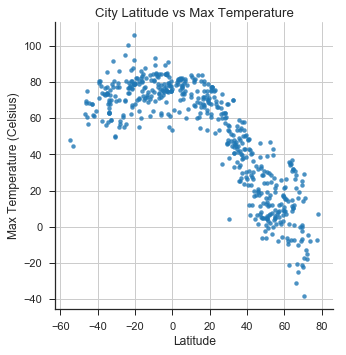

In [21]:
# plot latitude to temp
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Temp',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title("City Latitude vs Max Temperature")
plt.show()


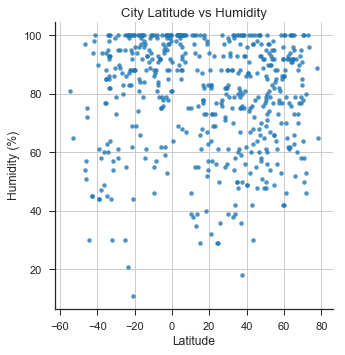

In [24]:
#plot city latitude to humidity
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Humidity',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.show()

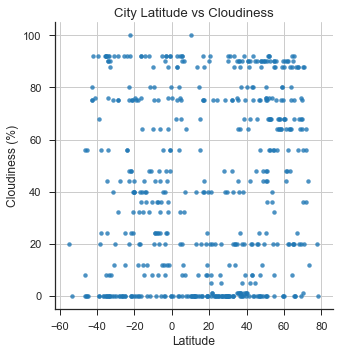

In [25]:
#plot city latitude to cloudiness
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Cloudiness',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.show()

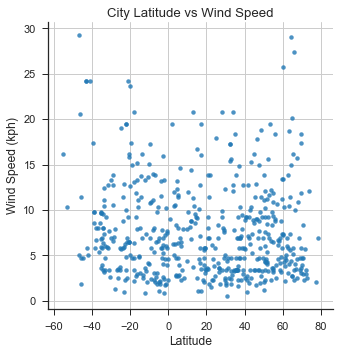

In [27]:
# plot city latitude to wind speed
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Wind Speed',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.title("City Latitude vs Wind Speed")
plt.show()